In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 76.1 MB/s eta 0:00:0000:010:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


Most Common PERSON Entities in Hate Transcripts:
          Entity  Count
0        Bularia      6
1          Samir      4
2        Francis      4
3          Mandy      2
4        Jupiter      2
5         Antwan      2
6           Mary      2
7  Gustavo Hamid      2
8      Al Pacino      2
9  sapara jatiki      2

Most Common PERSON Entities in Non-Hate Transcripts:
     Entity  Count
0      Mary      7
1  Sundaram      6
2     Sally      5
3      John      5
4      Kali      4
5   Sangham      4
6    gandhi      4
7     David      4
8      Babu      4
9      Chad      4


<Axes: title={'center': 'Most Common PERSON Entities in Non-Hate Transcripts'}, xlabel='Entity'>

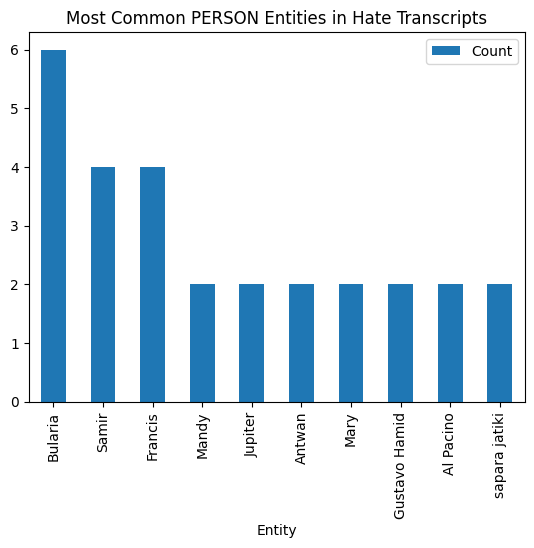

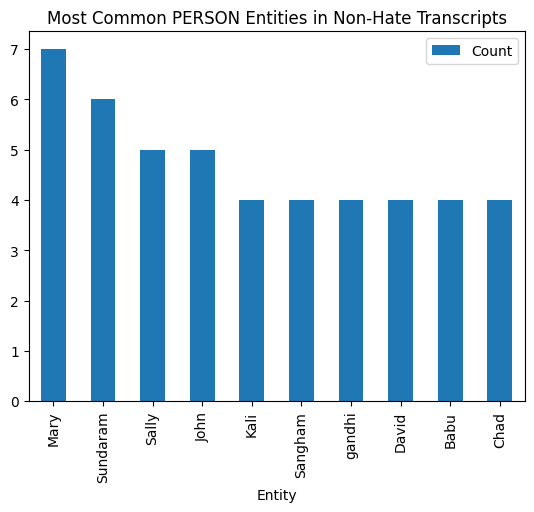

In [4]:
import spacy
import json
from collections import Counter
import pandas as pd
import os

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Define the paths to your JSON files
hate_path = '/kaggle/input/transcripts-hate/transcriptions_english_final_hate.json'
non_hate_path = '/kaggle/input/transcripts-non-hate/transcriptions_english_non_hate_final.json'

# Load your hate and non-hate transcripts
with open(hate_path, 'r') as f:
    hate_transcripts = json.load(f)

with open(non_hate_path, 'r') as f:
    non_hate_transcripts = json.load(f)

# Function to extract entities
def extract_entities(transcripts):
    entities = []
    for item in transcripts:
        transcript = item['transcription']
        doc = nlp(transcript)
        for ent in doc.ents:
            entities.append(ent.label_)
    return entities

# Perform NER and count entity tags
hate_entities = extract_entities(hate_transcripts)
non_hate_entities = extract_entities(non_hate_transcripts)

# Count entity tags
hate_entity_counts = Counter(hate_entities)
non_hate_entity_counts = Counter(non_hate_entities)

# Normalize the counts
def normalize_counts(counts, total):
    return {key: value / total for key, value in counts.items()}

total_hate = sum(hate_entity_counts.values())
total_non_hate = sum(non_hate_entity_counts.values())

normalized_hate_entity_counts = normalize_counts(hate_entity_counts, total_hate)
normalized_non_hate_entity_counts = normalize_counts(non_hate_entity_counts, total_non_hate)

# Extract and count PERSON entities
def extract_person_entities(transcripts):
    person_entities = []
    for item in transcripts:
        transcript = item['transcription']
        doc = nlp(transcript)
        for ent in doc.ents:
            if ent.label_ == 'PERSON':
                person_entities.append(ent.text)
    return person_entities

hate_person_entities = extract_person_entities(hate_transcripts)
non_hate_person_entities = extract_person_entities(non_hate_transcripts)

# Count person entities
hate_person_counts = Counter(hate_person_entities)
non_hate_person_counts = Counter(non_hate_person_entities)

# Get most common PERSON entities
most_common_hate_person = hate_person_counts.most_common(10)
most_common_non_hate_person = non_hate_person_counts.most_common(10)

# Convert to DataFrame for better visualization
df_hate_person = pd.DataFrame(most_common_hate_person, columns=['Entity', 'Count'])
df_non_hate_person = pd.DataFrame(most_common_non_hate_person, columns=['Entity', 'Count'])

# Display results
print("Most Common PERSON Entities in Hate Transcripts:")
print(df_hate_person)

print("\nMost Common PERSON Entities in Non-Hate Transcripts:")
print(df_non_hate_person)

# Save the results to CSV files for further analysis or visualization
df_hate_person.to_csv('/kaggle/working/hate_person_entities.csv', index=False)
df_non_hate_person.to_csv('/kaggle/working/non_hate_person_entities.csv', index=False)

# Visualize the results using bar plots
df_hate_person.plot(kind='bar', x='Entity', y='Count', title='Most Common PERSON Entities in Hate Transcripts')
df_non_hate_person.plot(kind='bar', x='Entity', y='Count', title='Most Common PERSON Entities in Non-Hate Transcripts')
